# **Data Study Notebook**

**Objectives**  
Answer Business Requirement 1:  
> The client is interested in discovering how the house attributes correlate with the sale price.  
We will:
- Load the cleaned housing data
- Transform categorical variables into numbers
- Calculate Pearson and Spearman correlations
- Visualise which variables most affect sale price
- Draw conclusions and test hypotheses

**Inputs**
- `outputs/datasets/cleaned/FullSetCleaned.csv`

**Outputs**
- Correlation tables
- Plots (saved to `docs/plots/`)
- CSV file for Streamlit dashboard use

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-house-price-predictor/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-house-price-predictor'

---

## Load and Inspect the Data

We load the cleaned dataset produced during the data cleaning stage and perform a basic inspection.

This includes:
- Previewing the data
- Checking the number of rows and columns
- Identifying column data types and any remaining object-type variables

### Load and Preview the Data

In [4]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("outputs/datasets/cleaned/FullSetCleaned.csv")

# Preview the first 5 rows
print("Preview of cleaned dataset:")
display(df.head())

# Check dataset structure
print("\nData summary:")
df.info()

Preview of cleaned dataset:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1232,0.0,2.0,Av,724,GLQ,508,632,NaN,2007.0,...,7314,64.0,82.0,0,5,7,1232,2007,2007,194500
1,1445,689.0,5.0,No,0,Unf,844,441,Unf,1930.0,...,11888,69.0,0.0,60,6,6,844,1916,1994,214500
2,1337,0.0,3.0,Mn,699,GLQ,638,531,RFn,2003.0,...,8450,65.0,0.0,39,5,7,1337,2003,2003,185000
3,958,0.0,2.0,No,120,ALQ,958,440,RFn,1977.0,...,4928,69.0,0.0,205,5,6,1078,1976,1976,128000
4,1134,0.0,2.0,No,588,NaN,422,254,NaN,1960.0,...,7000,70.0,45.0,16,7,5,1010,1960,2002,135000



Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1422 non-null   object 
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1315 non-null   object 
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1225 non-null   object 
 9   GarageYrBlt   1460 non-null   float64
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  LotArea       1460 non-null   int64  
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF  

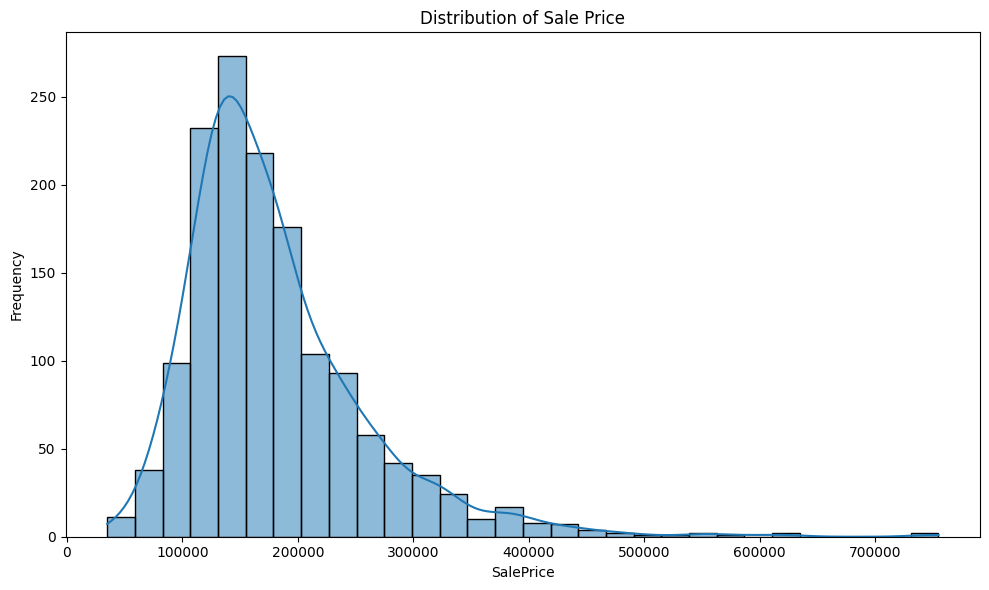

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribution of Sale Price")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Interpretation
The `SalePrice` distribution is right-skewed, indicating that most properties sell for lower prices, with fewer high-end sales. This supports using a log transformation later in the modeling pipeline to normalize the target variable.

---

## Prepare Categorical Variables for Analysis

Correlation calculations require all features to be numeric.

This step:
- Fills missing values in categorical variables using 'None'
- Applies **Ordinal Encoding** to convert categories into meaningful numerical values
- Confirms that all features are now numeric and ready for correlation analysis

Fill in missing values first

In [5]:
# Replace any missing values with 'None'
df[['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']] = \
    df[['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']].fillna('None')

Ordinal Encoding

In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for each variable
categories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],                        
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],      
    ['None', 'Unf', 'RFn', 'Fin'],                          
    ['Fa', 'TA', 'Gd', 'Ex']                                
]

encoder = OrdinalEncoder(categories=categories, dtype='int64')

df[df.select_dtypes(include='object').columns] = encoder.fit_transform(
    df.select_dtypes(include='object')
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1460 non-null   int64  
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1460 non-null   int64  
 9   GarageYrBlt   1460 non-null   float64
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   int64  
 12  LotArea       1460 non-null   int64  
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

---

# Correlation Analysis — What Affects Sale Price

### Calculate Pearson and Spearman Correlations

In [8]:
# Calculate Spearman and Pearson correlations with SalePrice
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]

# Display the top 10 for each
print("Spearman correlation (top 10):")
display(corr_spearman.head(10))

print("\nPearson correlation (top 10):")
display(corr_pearson.head(10))

Spearman correlation (top 10):


OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
GarageYrBlt     0.563256
OpenPorchSF     0.477561
Name: SalePrice, dtype: float64


Pearson correlation (top 10):


OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
Name: SalePrice, dtype: float64

### Interpretation of Correlation Results

Both the Spearman and Pearson correlation results suggest that certain features are strongly related to house sale prices.

- `OverallQual` and `GrLivArea` show the highest correlation with `SalePrice` in both methods.
- Spearman gives higher importance to `KitchenQual` and `YearBuilt`, which are ordinal features.
- Pearson highlights `MasVnrArea` more, suggesting a stronger linear relationship with price.

Overall, these features are good candidates for further analysis as they are consistently associated with changes in house price.

---

## Combine Pearson and Spearman Correlations

To identify the most influential features, we combine the Pearson and Spearman correlation scores into a single "Score".

Features with a combined score of 1.2 or higher (average of 0.6+) are considered strongly correlated with SalePrice and will be studied further

In [9]:
# Combine correlation values and identify top features to study further

combined_correlation = corr_pearson + corr_spearman
study_further_threshold = 1.2

# Create a dataframe with scores and study flag
combined_correlation_df = pd.DataFrame({
    'Feature': combined_correlation.index,
    'Spearman': corr_spearman,
    'Pearson': corr_pearson,
    'Score': combined_correlation.sort_values(ascending=False)
})

# Add a column to indicate which features to study further
combined_correlation_df['Study'] = combined_correlation_df['Score'] >= study_further_threshold

# Display only the features selected for further study
top_features_df = combined_correlation_df[combined_correlation_df['Study'] == True]
top_features_df = top_features_df.sort_values(by='Score', ascending=False)

display(top_features_df)

,Feature,Spearman,Pearson,Score,Study
OverallQual,OverallQual,0.809829,0.790982,1.600810,True
GrLivArea,GrLivArea,0.731310,0.708624,1.439934,True
KitchenQual,KitchenQual,0.672849,0.659600,1.332448,True
GarageArea,GarageArea,0.649379,0.623431,1.272810,True
TotalBsmtSF,TotalBsmtSF,0.602725,0.613581,1.216306,True


### Interpretation

The features above are the most influential predictors of sale price. These will be used for further analysis and visualisation in the next step.

---

## Visualise Correlation Scores

This chart shows which features are most strongly correlated with `SalePrice`, based on the combined Pearson and Spearman scores.

We highlight features with a score above 1.2 as candidates for further analysis and model input.

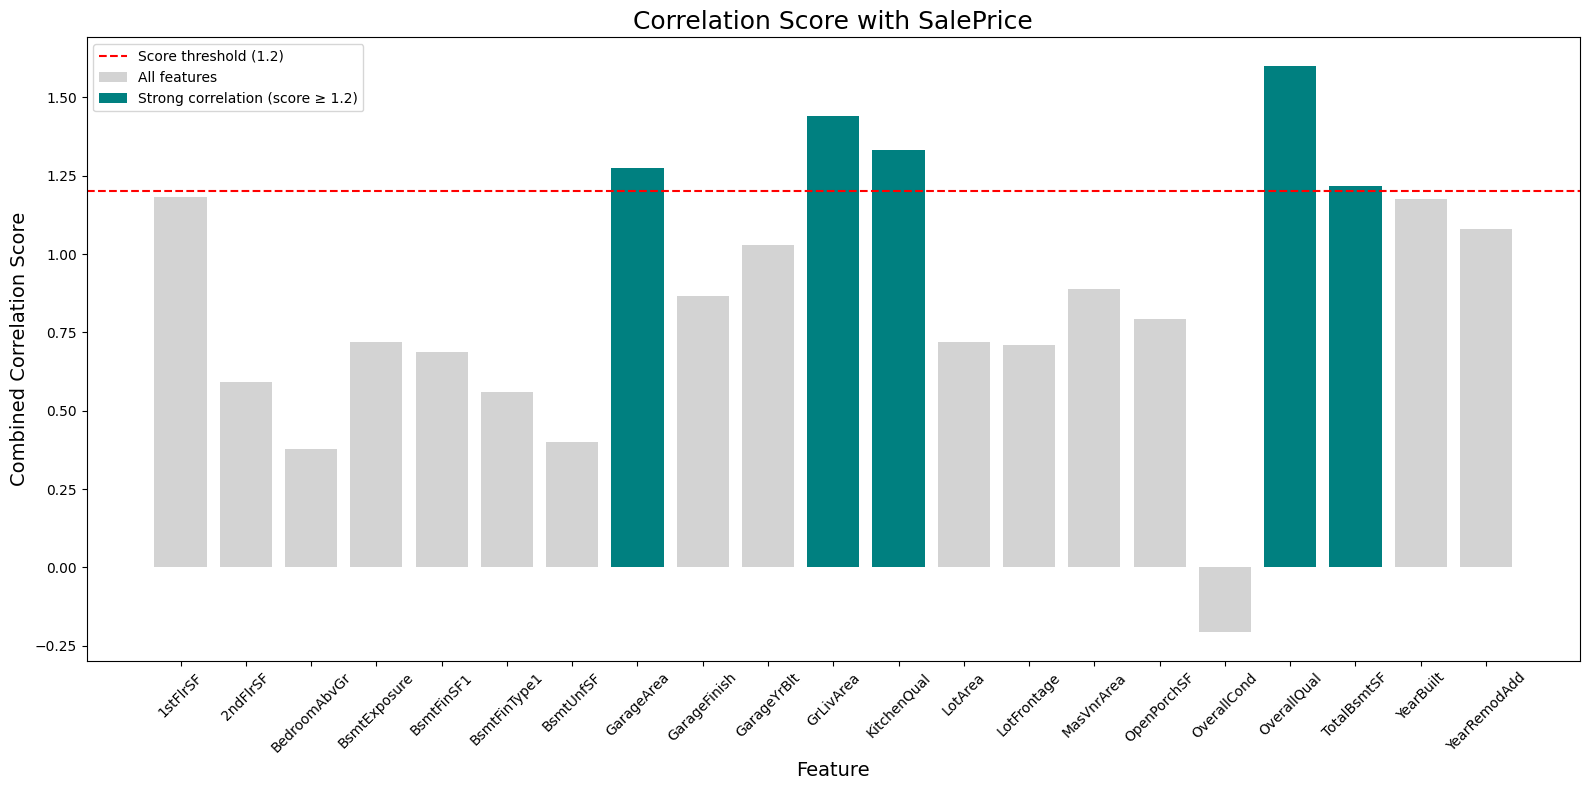

In [10]:
import matplotlib.pyplot as plt

# Plot all features by score, highlighting those to study further
plt.figure(figsize=(16, 8))

# Bar for all features
plt.bar(combined_correlation_df['Feature'], combined_correlation_df["Score"],
        color='lightgrey', label="All features")

# Overlay: Bar for features to study further
plt.bar(top_features_df['Feature'], top_features_df["Score"],
        color='teal', label="Strong correlation (score ≥ 1.2)")

# Add labels
plt.title("Correlation Score with SalePrice", fontsize=18)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Combined Correlation Score", fontsize=14)
plt.axhline(y=1.2, color='red', linestyle='--', label="Score threshold (1.2)")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### Interpretation

This bar chart shows which features have the strongest combined correlation with `SalePrice`.

The red line marks the threshold (1.2). Features above this line are considered strongly correlated and will be used for further analysis in the next steps.

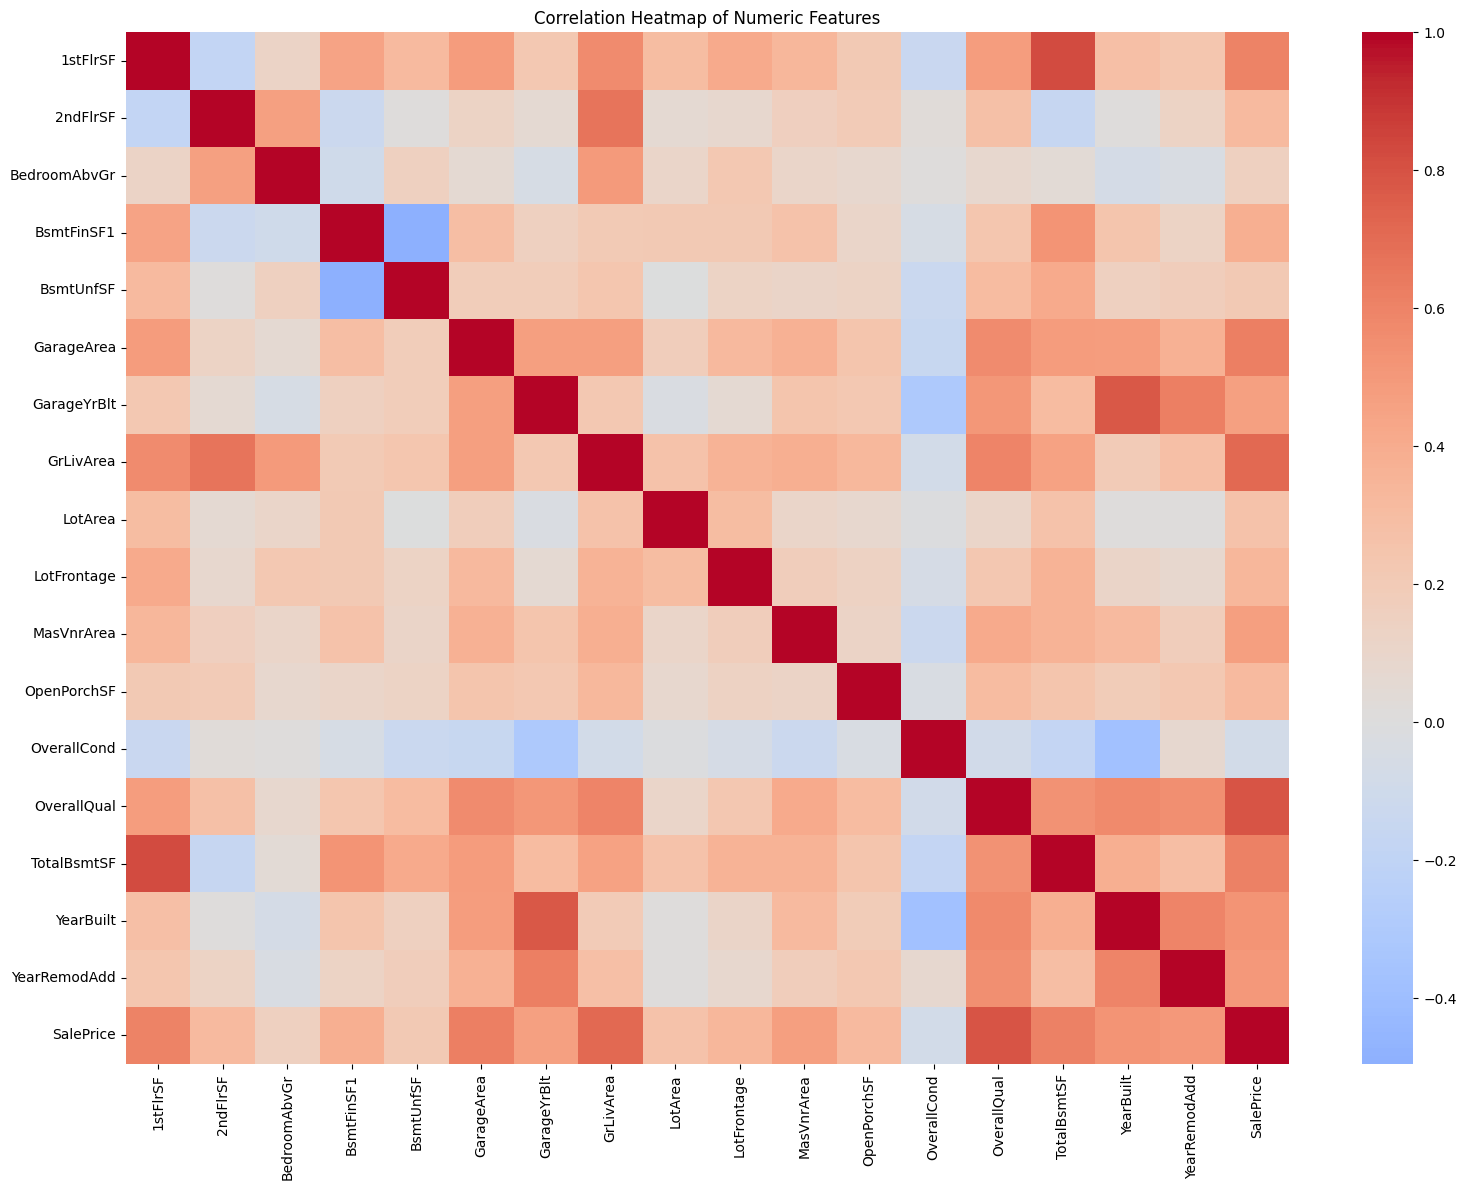

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix of numerical features
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

### Interpretation

This heatmap shows how strongly numerical features correlate with each other and with `SalePrice`. Features like `OverallQual`, `GrLivArea`, and `GarageCars` show strong positive relationships with `SalePrice`, helping justify their inclusion in further analysis and modeling.

---

## Visualise the Relationship with SalePrice

We now create scatter plots for numerical features and box plots for ordinal features. 

These charts help us:
- Understand the nature of the relationships (linear, curved, etc.)
- Spot outliers or unusual patterns
- Build visual content for our final dashboard

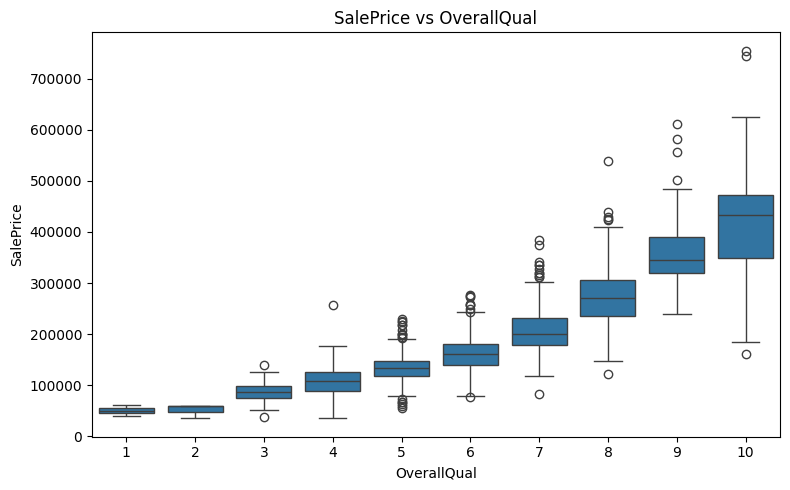

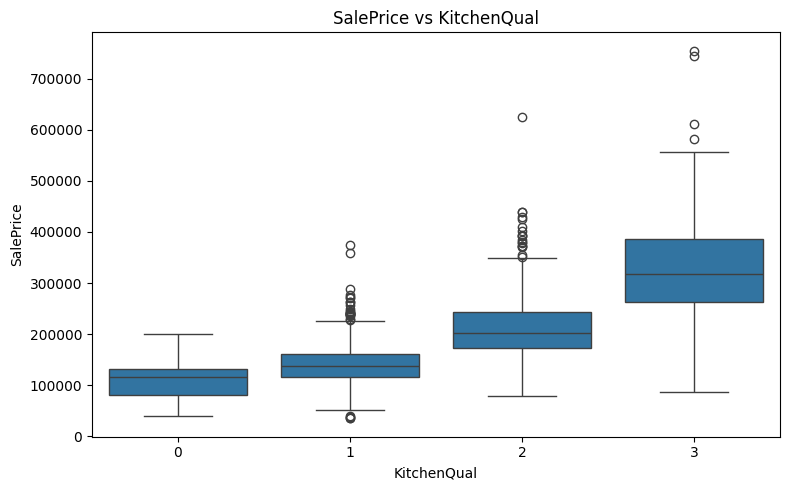

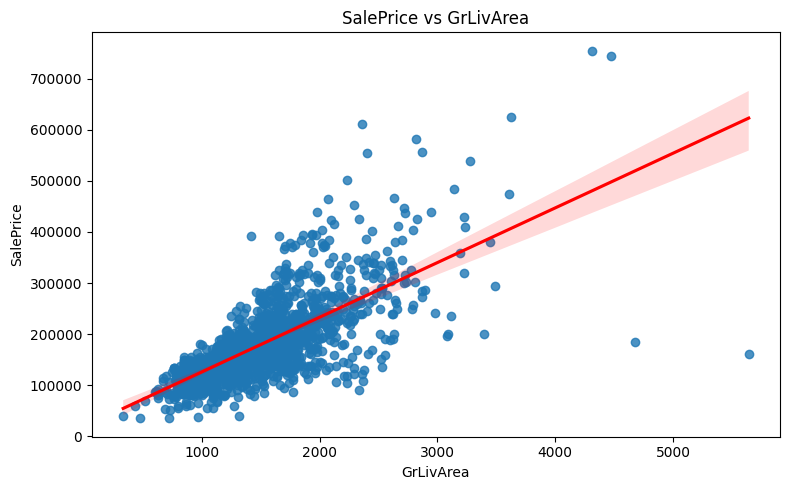

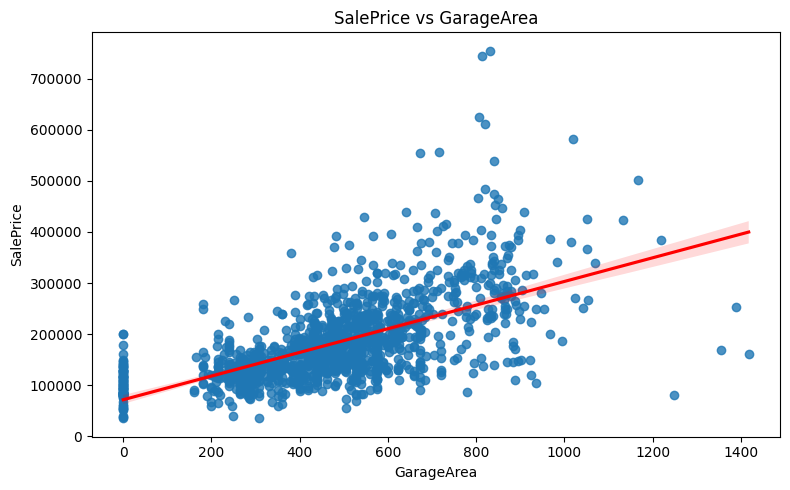

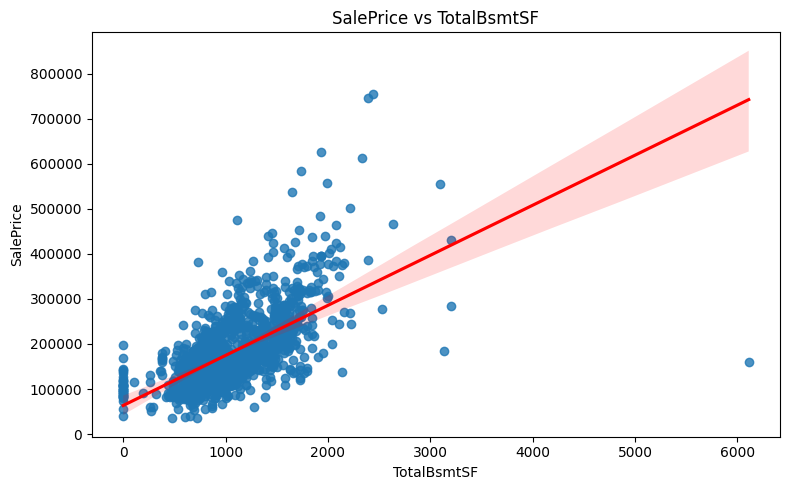

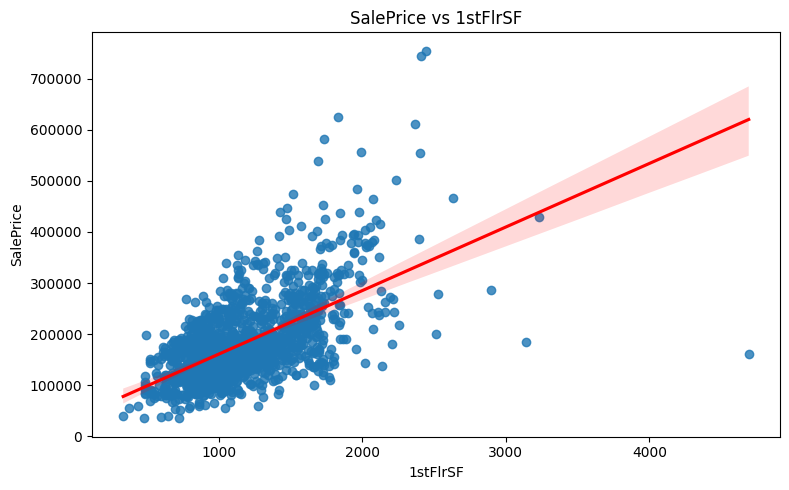

In [11]:
import seaborn as sns

# Define feature groups
boxplot_vars = ['OverallQual', 'KitchenQual']
scatter_vars = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

# Box plots
for var in boxplot_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=var, y='SalePrice', data=df)
    plt.title(f"SalePrice vs {var}")
    plt.xlabel(var)
    plt.ylabel("SalePrice")
    plt.tight_layout()
    plt.show()

# Scatter plots
for var in scatter_vars:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=var, y='SalePrice', data=df, line_kws={"color": "red"})
    plt.title(f"SalePrice vs {var}")
    plt.xlabel(var)
    plt.ylabel("SalePrice")
    plt.tight_layout()
    plt.show()

### Interpretation

These plots show a clear upward trend for most variables — confirming that as feature values increase (size, quality, etc.), so does the sale price.

This supports our earlier correlation results and validates our hypotheses visually.

---

## Link to Hypotheses and Summarise Findings

In this step, we evaluate whether our original assumptions (hypotheses) are supported by the data.

We look at both the correlation scores and the visual plots to decide.

### Hypothesis Review

1. **Bigger houses tend to sell for more**
   - Supported
   - Strong correlations for `GrLivArea`, `TotalBsmtSF`, `GarageArea`, and `1stFlrSF`.
   - Scatter plots show a clear positive trend.

2. **Higher quality homes are more valuable**
   - Strongly supported
   - `OverallQual` had the highest correlation score of all features.
   - Box plots confirm higher prices for higher quality ratings.
   - `KitchenQual` also showed a strong relationship.

3. **Newer or recently renovated homes sell for more**
   - Partially supported
   - `YearBuilt` and `YearRemodAdd` showed moderate correlation.
   - Still worth exploring further but not as strong as size and quality.

### Conclusion

Our analysis confirms that house size and quality are the strongest predictors of sale price in this dataset. These results guide us toward which features to include in our prediction model.

---


# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.